### setup

In [1]:
library(dplyr)

library(ggplot2)
library(viridis)
library(ggpubr)

fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }
options(dplyr.summarise.inform = FALSE)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite



In [3]:
wd <- '~/codebases/MacBrainDev/'
data.dir <- 'data/'
setwd(wd)

n.cores <- as.numeric(Sys.getenv('SLURM_CPUS_PER_TASK'))
n.cores <- if (is.na(n.cores)) parallel::detectCores() else n.cores



# Define filename
base.name <- 'All.MNN.v1.org.fct'
indata.fname <- paste0(data.dir, base.name, '.rds')

gene.sets <- readRDS(paste0(data.dir, 'ewce_important_genesets.rds'))

all.genes <- gene.sets$hs.data.genes

dis.genes.list <- gene.sets$disease_lists.data

grupos <- readRDS(paste0(data.dir, 'ewce_exp_groups.rds'))

In [5]:
Diseases <- readRDS(paste0(data.dir, 'DiseaseListsInfo.rds'))

disease.listnames <- names(Diseases$alphabetical)

disease.info <- as.data.frame(do.call('rbind', lapply(strsplit(disease.listnames, split='::', fixed=T), function(x){setNames(if (length(x)==1) c('GWAS', x) else x, c('Disease.group', 'Disease.name'))})))
disease.info$Disease.listname <- disease.listnames                                                                                                                             
disease.info$Disease.group <- factor(disease.info$Disease.group, levels=c('GWAS', 'MAGMA', 'DISGENET'))
disease.info$Disease.name <- factor(disease.info$Disease.name, levels=sort(unique(disease.info$Disease.name)))

disease.names <- setNames(disease.info$Disease.name, disease.info$Disease.listname)
disease.groups <- setNames(disease.info$Disease.group, disease.info$Disease.listname)
disease.groups

ASD HC65 
                                    GWAS 
                                      DD 
                                    GWAS 
                            SFARI Score2 
                                    GWAS 
                            SFARI Score3 
                                    GWAS 
                         SFARI Syndromic 
                                    GWAS 
                           GWAS::AD 2019 
                                    GWAS 
                         GWAS::ADHD 2019 
                                    GWAS 
                           GWAS::AN 2019 
                                    GWAS 
                          GWAS::ASD 2019 
                                    GWAS 
                           GWAS::BD 2019 
                                    GWAS 
                           GWAS::IQ 2018 
                                    GWAS 
                          GWAS::MDD 2018 
                                    GWAS 
                       GWAS::NEUROT 2018 
                                    GWAS 
                           GWAS::PD 2014 
                                    GWAS 
                          GWAS::SCZ 2020 
                                    GWAS 
                          MAGMA::AD 2019 
                                   MAGMA 
                        MAGMA::ADHD 2019 
                                   MAGMA 
                          MAGMA::AN 2019 
                                   MAGMA 
                         MAGMA::ASD 2019 
                                   MAGMA 
                          MAGMA::BD 2019 
                                   MAGMA 
                          MAGMA::IQ 2018 
                                   MAGMA 
                         MAGMA::MDD 2018 
                                   MAGMA 
                      MAGMA::NEUROT 2018 
                                   MAGMA 
                         MAGMA::OCD 2018 
                                   MAGMA 
                          MAGMA::PD 2014 
                                   MAGMA 
                         MAGMA::SCZ 2020 
                                   MAGMA 
                          MAGMA::TS 2019 
                                   MAGMA 
       DISGENET::Giant Cell Glioblastoma 
                                DISGENET 
                  DISGENET::Glioblastoma 
                                DISGENET 
       DISGENET::Glioblastoma Multiforme 
                                DISGENET 
                        DISGENET::Glioma 
                                DISGENET 
DISGENET::M.Oligoastr+Oligodendrogliomas 
                                DISGENET 
              DISGENET::Malignant Glioma 
                                DISGENET 
              DISGENET::Medulloblastomas 
                                DISGENET 
                 DISGENET::Neuroblastoma 
                                DISGENET 
Levels: GWAS MAGMA DISGENET

In [6]:
# Load data
indata <- readRDS(indata.fname)
# Print summary
indata

clusters <- data.frame(unique(indata@meta.data[,c('subclass','subtype')]))
rownames(clusters) <- clusters$subtype
clusters

rm('indata')
gc()

Loading required package: SeuratObject

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Loading required package: Seurat



An object of class Seurat 
34619 features across 761529 samples within 1 assay 
Active assay: RNA (34619 features, 0 variable features)
 2 dimensional reductions calculated: mnn, umap

,subclass,subtype
,<fct>,<fct>
Cls FGF17 LGI1,PAT-related subtypes,Cls FGF17 LGI1
RGC FABP7 PMP22,dorsal NSC,RGC FABP7 PMP22
IPC RSPO3 NHLH1,CR,IPC RSPO3 NHLH1
InN SP8 MEIS2 RND3,Inhibitory neurons,InN SP8 MEIS2 RND3
PC NKX2-1 NKX6-2,Patterning centers,PC NKX2-1 NKX6-2
PC FGF17,Patterning centers,PC FGF17
PC NKX2-1 LMO1,Patterning centers,PC NKX2-1 LMO1
vRG HMGA2 CCND1,dorsal NSC,vRG HMGA2 CCND1
IPC RSPO3 NEUROG1,CR,IPC RSPO3 NEUROG1


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3059482,163.4,8570336,457.8,9937180,530.8
Vcells,5838867,44.6,3801812760,29005.6,2827677972,21573.5


In [8]:
# files <- grep('expression_data', dir(path = data.dir), value=T, fixed=T)
# files <- grep('test|Report|rds$', files, value = T, invert = T)
# files <- grep('ds100', files, value = T, invert = T, fixed=T)
# files <- paste0(data.dir, files)
# files <- split(files, 
#                sapply(strsplit(files, split='.', fixed=T), function(x) {rev(x)[2]}))
#                       
# files <- lapply(files,function(x){
#     as.list(setNames(x, sapply(strsplit(x, split='.', fixed=T), function(y){y[2]})))
# })
# files <- files[sapply(files, function(x){'DotPlot' %in% names(x)})]
# files <- files['PCs_1']
# files

files <- list(
    PCs_1 = list(
        DotPlot = 'data/Disease_expression_data.DotPlot.PCs_1.csv',
        Markers ='data/Disease_expression_data.Markers.PCs_1.csv'))

files

$PCs_1
$PCs_1$DotPlot
[1] "data/Disease_expression_data.DotPlot.PCs_1.csv"

$PCs_1$Markers
[1] "data/Disease_expression_data.Markers.PCs_1.csv"

### ranges of expression

In [9]:
get.dp.data <- function(fname, 
                        expressed.over.pct=5, 
                        dis...cluster...marker...filter=NULL,
                        annot.disease=T){
    
    # Read data
    dp.data <- read.csv(fname, row.names=1)
    # Change "id" -> "cluster"
    colnames(dp.data) <- gsub('id', 'cluster', colnames(dp.data), fixed=T)
    
    # Filter data using disease, cluster and marker gene
    ## Filters are used as a pasted string of the three variables using "..." as separator
    ## Used for gather expression of specific subsets in odds.ratio calculations
    if (!is.null(dis...cluster...marker...filter)){
        dis.cluster.gene <- apply(dp.data[, c('Disease.listname', 'cluster', 'features.plot')], 1, paste, collapse='...')
        dp.data <- dp.data[dis.cluster.gene %in% dis...cluster...marker...filter, ]
    }
 
    # Summarise marker info in a df
    df <- dp.data %>% 
        group_by(cluster, Disease.listname) %>%
        summarize(
            median.pct.exp=median(pct.exp), # % cells: median
            median.avg.exp=median(avg.exp), # avg expression: median
            median.avg.exp.scaled=median(avg.exp.scaled, na.rm=T), # avg scaled expression: median
            mean.pct.exp=mean(pct.exp), # % cells: mean
            mean.avg.exp=mean(avg.exp), # avg expression: mean
            mean.avg.exp.scaled=mean(avg.exp.scaled, na.rm=T), # avg scaled expression: mean
            n.pct.exp.over=sum(pct.exp>expressed.over.pct), # Number of genes over threshold
            fr.pct.exp.over=mean(pct.exp>expressed.over.pct), # Fraction of genes over threshold
            n.genes=length(unique(features.plot))) # Total number of genes per cluster and dislist

    # Add info about disease lists
    if (annot.disease){
        df$Disease.name <- disease.names[df$Disease.listname]
        df$Disease.group <- disease.groups[df$Disease.listname]
        df <- df[!is.na(df$Disease.name),]
    }
    
    return(df)
}

In [10]:
# check ranges of expression

df <- get.dp.data(files$PCs_1$DotPlot, 10, dis...cluster...marker...filter = NULL)

df$cluster <- factor(df$cluster, grupos$PCs_1$idents)
dff <- as.data.frame(df %>% group_by(cluster) %>% summarise(mean=mean(fr.pct.exp.over), sd=sd(fr.pct.exp.over), min=min(fr.pct.exp.over), max=max(fr.pct.exp.over)))
rownames(dff) <- as.character(dff$cluster)
dff$cluster <- NULL
dff <- dff * 100
dff$range <- paste0(round(dff$mean,2), '% (+/-',round(dff$sd,2)/2, '%)')
dff
# write.csv(dff, 'DiseaseGenesExpression/PCs_1/Disease-risk gene expression plot.min.pct.10.PctExpressionRanges.csv', row.names=T)

,mean,sd,min,max,range
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
PC FGF17,30.08314,6.449789,18.51852,48.80952,30.08% (+/-3.225%)
PC NKX2-1 NKX6-2,29.47954,6.484708,18.00000,46.42857,29.48% (+/-3.24%)
PC NKX2-1 LMO1,28.25617,6.550555,17.44186,47.61905,28.26% (+/-3.275%)
GE RG NKX2-1 DLK1,27.89752,7.171736,17.44186,47.61905,27.9% (+/-3.585%)
GE RG NKX2-1 OLIG1,27.07620,7.273960,14.07407,46.42857,27.08% (+/-3.635%)
PC RSPO3,29.09456,7.323592,17.90698,53.57143,29.09% (+/-3.66%)
PC TTR,35.79569,6.691903,23.95349,54.76190,35.8% (+/-3.345%)
PC SFRP2,25.80511,6.652201,14.81481,42.85714,25.81% (+/-3.325%)
PC TCF7L2,26.98519,5.530618,17.20930,40.00000,26.99% (+/-2.765%)


In [11]:
range(dff$mean)

[1] 25.80511 35.79569

### Fraction of diseases genes expressed

In [12]:
p1.opt.a <- function(df, facet.type=F){
    
    p <- ggplot(df, aes(x=cluster, 
                        y=factor(Disease.name, sort(unique(Disease.name), decreasing = T)),
                        label=ifelse(n.pct.exp.over!=0, n.pct.exp.over, NA),
                        color=median.avg.exp,
                        size=ifelse(n.pct.exp.over==0, NA, fr.pct.exp.over))) +
    
    guides(color = guide_colorbar(title.position = "top"),
           size = guide_legend(title.position = "top")) +
    
    geom_point(shape=16) +
    
    geom_text(size=2, color='black') + 
    
    # scale_color_viridis() +
    scale_color_gradient(low = 'lightgrey', high='red') +
    
    labs(x='Cluster', 
         y='Disease', 
         size='% Disease-risk genes expressed', 
         color='Median average expression', 
         label='# Disease-risk genes expressed') +
    
    facet_grid(rows=vars(Disease.group), 
               cols=if (facet.type) vars(subclass) else NULL,
               scales='free', space='free') +
    
    scale_size_continuous(range=c(2,7)) +

    theme_pubr(base_family='Arial', legend = 'bottom') + labs_pubr() + 
    theme(text = element_text(family = 'ArialMT')) +

    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +

    theme(panel.background = element_rect(fill = "#F2F2F2"),
          panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour = "darkgrey"))


    
    
    return(p)
}

In [13]:
lapply(grupos, function(x) length(x$idents))

wids <- setNames(c(11, 30, 8, 7, 8, 14, 10), names(grupos))
wids

$All_clusters
[1] 15

$All_subclusters
[1] 112

$PCs_1
[1] 9

$PCs_2
[1] 7

$PCs_3
[1] 11

$Progenitors
[1] 26

$Neural_Stem_Cells
[1] 17

All_clusters   All_subclusters             PCs_1             PCs_2 
               11                30                 8                 7 
            PCs_3       Progenitors Neural_Stem_Cells 
                8                14                10

In [15]:
plot.label.1 <- 'DiseaseGenesExpression'

min.pct <- 10
g.plot <- 'PCs_1'



message(as.character(min.pct))
print(g.plot)
        

# Get table
df <- get.dp.data(files[[g.plot]]$DotPlot, expressed.over.pct = min.pct)
        
# Set titles and labels and so on.
subtitle <- paste0(gsub(pattern = '_', replacement = ' ', fixed = T, x = g.plot),
                   " (min. exp.: ", min.pct, "% cells)")
wid <- wids[g.plot]
        
# Set type and subtype
if (grupos[[g.plot]]$group.by == 'subclass'){

    facet.type <- F

    df$cluster <- droplevels(factor(df$cluster, levels=levels(clusters$subclass)))

} else {

    facet.type <- T

    df$subclass <- droplevels(clusters[df$cluster, 'subclass'])

    # Set PC order
    if (grepl('PCs_', x=g.plot, fixed=T)){
        df$cluster <- droplevels(factor(df$cluster, levels=grupos[[g.plot]]$idents))
    } else {
        df$cluster <- droplevels(factor(df$cluster, levels=rownames(clusters)))
    }
}

table.fname <- file.path(plot.label.1, g.plot,
                   paste('Disease-risk gene expression plot', 'min.pct', min.pct, 'csv', sep='.'))
dir.create(dirname(table.fname), showWarnings = F, recursive=T)
write.csv(df, table.fname)
        


# Get plot
exp.plot <- p1.opt.a(df, facet.type = facet.type)        

# Label plot
exp.plot <- exp.plot + ggtitle(label = "Disease-risk genes' expression", subtitle=subtitle) +  xlab(paste('Cell', grupos[[g.plot]]$group.by))
# Rotate facet labels
if (g.plot == 'All_subclusters'){
    exp.plot <- exp.plot + theme(strip.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5))
}


# Save
fname <- file.path(plot.label.1, g.plot,
                   paste('Disease-risk gene expression plot', 'min.pct', min.pct, 'pdf', sep='.'))

ggsave(filename = fname, plot = exp.plot, width = wid, height=15, useDingbats=FALSE)

10



[1] "PCs_1"


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [16]:
p1 <- exp.plot

## Disease-risk genes overlap with markers

### Odds ratios

In [17]:
get.prop.table <- function(fname, no.expression.pct.limit=0.10, expression.pct.limit=0.10, dpdata.fname=NULL){
    
    mrk.data <- read.csv(fname, row.names=1)

    mrk.data$exp.1 <- ifelse(mrk.data$pct.1 < no.expression.pct.limit, 'Not expressed', ifelse(mrk.data$pct.1 >= expression.pct.limit, 'Expressed', NA))
    mrk.data$exp.2 <- ifelse(mrk.data$pct.2 < no.expression.pct.limit, 'Not expressed', ifelse(mrk.data$pct.2 >= expression.pct.limit, 'Expressed', NA))

    # print(table(mrk.data[,c('exp.1', 'exp.2')]))
    mrk.data.filt <- filter(mrk.data, p_val_adj <=0.05 & exp.1 == 'Expressed' & exp.2 == 'Not expressed')

    marker.list <- split(mrk.data.filt$gene, mrk.data.filt$cluster)

    odd.table <- get.odds(marker.list)
    
    if(sum(odd.table$n)<1){return(NULL)}
    
    if (!is.null(dpdata.fname)){

        dis.id.gene.filter <- tidyr::separate_rows(
            data = odd.table,
            risk.markers, 
            sep = ',')
        dis.id.gene.filter <- dis.id.gene.filter[, c('Disease.listname', 'cluster', 'risk.markers')]
        dis.id.gene.filter <- dis.id.gene.filter[dis.id.gene.filter$risk.markers!='',]
        dis.id.gene.filter <- apply(dis.id.gene.filter, 1, paste, collapse='...')
        
        # dpdata <- get.dp.data(dpdata.fname, 10, dis...cluster...marker...filter = dis.id.gene.filter, annot.disease=F)
        dpdata <- get.dp.data(dpdata.fname, expression.pct.limit*100, dis...cluster...marker...filter = dis.id.gene.filter, annot.disease=F)
        odd.table <- merge(odd.table,dpdata,all=T, by=c('cluster', 'Disease.listname'))
    }
    
    return(odd.table)
    
    
}

In [18]:
get.odds <- function(marker.list, dis.genes.list=gene.sets$disease_lists.data[names(Diseases$alphabetical)]){
    
    pseudo.props <- c()
    # all.tables <- list()

    for (dis in names(dis.genes.list)){

        dis.state <- factor(ifelse(all.genes %in% dis.genes.list[[dis]], 'Risk', 'Not risk'),
                            levels=c('Risk', 'Not risk'))

        for (st in names(marker.list)){

            subt.state <- factor(ifelse(all.genes %in% marker.list[[st]], 'Marker', 'Not marker'), 
                                 levels=c('Marker', 'Not marker'))


            d <- data.frame(dis.state, subt.state, row.names=all.genes)
            colnames(d) <- c(dis, st)
            risk.markers <- paste(rownames(d)[(d[,1]=='Risk') & (d[,2]=='Marker')], collapse=',')
            contable <- table(d)
            
            ## Hacer fisher y sacar odd ratio
            ### Si sale en blanco: alpha ~ p.value
            ### Añadir el número
            fish.test <- fisher.test(x=contable, alternative='greater')
            # conplot <- plot(contable)
            conmarg <- addmargins(contable)

            ad.bc <- (conmarg['Risk', 'Marker'] * conmarg['Not risk', 'Not marker']) / (conmarg['Risk', 'Not marker'] * conmarg['Not risk', 'Marker'])
            
            pseudo.prop <- conmarg['Risk', 'Marker']/conmarg['Risk', 'Sum']/conmarg['Sum', 'Marker']
            pseudo.props <- rbind(pseudo.props,
                                  c(Disease.listname=dis, cluster=st,
                                    n=conmarg['Risk', 'Marker'],
                                    p.value=fish.test$p.value, fish.test$estimate,
                                    ci.low=fish.test$conf.int[1], ci.high=fish.test$conf.int[2],
                                    ad.bc = ad.bc, risk.markers=risk.markers,
                                    log10=log10(fish.test$estimate), log2=log2(fish.test$estimate)))

            # all.tables[[paste(dis, st, sep=';;')]] <- list(`Gene info`=d,
            #                                                `Contingency table`=contable,
            #                                                `Contingency marginals`=conmarg,
            #                                                `Freq Risk+Marker`=pseudo.prop)

        }
    }

    pseudo.props <- as.data.frame(pseudo.props)
    pseudo.props$n <- as.numeric(pseudo.props$n)
    pseudo.props$`odds ratio` <- as.numeric(pseudo.props$`odds ratio`)
    pseudo.props$size.plot <- ifelse(pseudo.props$n==0, NA, pseudo.props$`odds ratio`)
    
    pseudo.props$Disease.name <- disease.names[pseudo.props$Disease.listname]
    pseudo.props$Disease.group <- disease.groups[pseudo.props$Disease.listname]
    pseudo.props <- pseudo.props[!is.na(pseudo.props$Disease.name),]
    
    pseudo.props$p.value <- as.numeric(pseudo.props$p.value)
    pseudo.props$p.value.fdr <- p.adjust(pseudo.props$p.value, method = 'fdr')
    
    pseudo.props$significance <- ifelse(pseudo.props$p.value.fdr < 0.05, 'Sign. adj.', ifelse(pseudo.props$p.value < 0.05, 'Sign. nom.', NA))
    
    return(pseudo.props)
    
    
}

### Plot enrichment

In [19]:
p2.opt.i <- function(df, facet.type=F){
    
    p <- ggplot(df, aes(x=cluster, 
                        y=factor(Disease.name, sort(unique(Disease.name), decreasing = T)),
                        label=ifelse(n==0, NA, n),
                        size=ifelse(n==0, NA, median.avg.exp),
                        # color=p.value<0.05,
                        color=log2(ifelse(n==0, NA, `odds ratio`)))) +
    
    guides(color = guide_colorbar(title.position = "top"),
           size = guide_legend(title.position = "top")) +
    
    geom_point(shape=16) +
    
    geom_text(size=2, color='black') + 
    
    scale_color_gradient2(low='blue', mid='white', high = 'red', midpoint = 0) +
    # scale_fill_continuous_divergingx(palette = 'BrBG', mid = 0, rev=T) +
    # scale_color_manual(values=c('TRUE'='black', 'FALSE'='#F2F2F2')) + 
    
    labs(x='Cluster', 
         y='Disease', 
         color='Odds ratio (log2)', 
         # color='p-value < 0.05',
         size='Median average expression', 
         label='# Marker disease-risk genes') +
    
    facet_grid(rows=vars(Disease.group), 
               cols=if (facet.type) vars(subclass) else NULL,
               scales='free', space='free') +
    
    scale_size_continuous(range=c(2,7)) +

    theme_pubr(base_family='Arial', legend = 'bottom') + labs_pubr() + 

    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    theme(text = element_text(family = 'ArialMT')) +

    theme(panel.background = element_rect(fill = "#F2F2F2"),
          panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour = "darkgrey"))


    
    
    return(p)
}

In [20]:
dir.create('DiseaseGenesMarkersExpression', showWarnings = F)
plot.label.2 <- 'DiseaseGenesMarkersExpression'

expression.threshold <- 0.1
min.pct <- 0.1
g.plot <- 'PCs_1'

print(paste('group:', g.plot))
print(paste('no exp:', expression.threshold))
print(paste('Exp:', min.pct))

# Get table
df <- get.prop.table(fname = files[[g.plot]]$Markers, 
                     no.expression.pct.limit = expression.threshold, 
                     expression.pct.limit = min.pct, 
                     dpdata.fname = files[[g.plot]]$DotPlot)

# Set titles and labels and so on.
subtitle <- paste0(gsub(pattern = '_', replacement = ' ', fixed = T, x = g.plot),
                   " (Not Exp:<", expression.threshold*100, "% Exp:>", min.pct*100, "%)")
wid <- wids[g.plot]

# Set type and subtype
if (grupos[[g.plot]]$group.by == 'subclass'){

    facet.type <- F

    df$cluster <- droplevels(factor(df$cluster, levels=levels(clusters$subclass)))

} else {

    facet.type <- T

    df$subclass <- droplevels(clusters[df$cluster, 'subclass'])

    # Set PC order
    if (grepl('PCs_', x=g.plot, fixed=T)){
        df$cluster <- factor(df$cluster, levels=grupos[[g.plot]]$idents)
    } else {
        df$cluster <- factor(df$cluster, levels=rownames(clusters)[rownames(clusters)%in%grupos[[g.plot]]$idents])
    }
}
table.fname <- file.path(plot.label.2, g.plot,
                   paste('Disease-risk marker gene expression plot', 'NotExp', expression.threshold, 'Exp', min.pct, 'csv', sep='.'))
dir.create(dirname(table.fname), showWarnings = F, recursive=T)
write.csv(df, table.fname)


# Get plot
exp.plot <- p2.opt.i(df, facet.type = facet.type)

# Label plot
exp.plot <- exp.plot + 
            ggtitle(label = "Disease-risk marker genes' expression", subtitle=subtitle) + 
            xlab(paste('Cell', grupos[[g.plot]]$group.by))

# Rotate facet labels
if (g.plot == 'All_subclusters'){
    exp.plot <- exp.plot + theme(strip.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5))
}

# Save
fname <- file.path(plot.label.2, g.plot,
                   paste('Disease-risk marker gene expression plot', 'NotExp', expression.threshold, 'Exp', min.pct, 'pdf', sep='.'))

ggsave(filename = fname, plot = exp.plot, width = wid, height=15, useDingbats=FALSE)
                


p2 <- exp.plot

[1] "group: PCs_1"
[1] "no exp: 0.1"
[1] "Exp: 0.1"


Warning message:
“Removed 177 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 177 rows containing missing values (`geom_text()`).”


Warning message:
“Removed 177 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 177 rows containing missing values (`geom_text()`).”


png 
  2

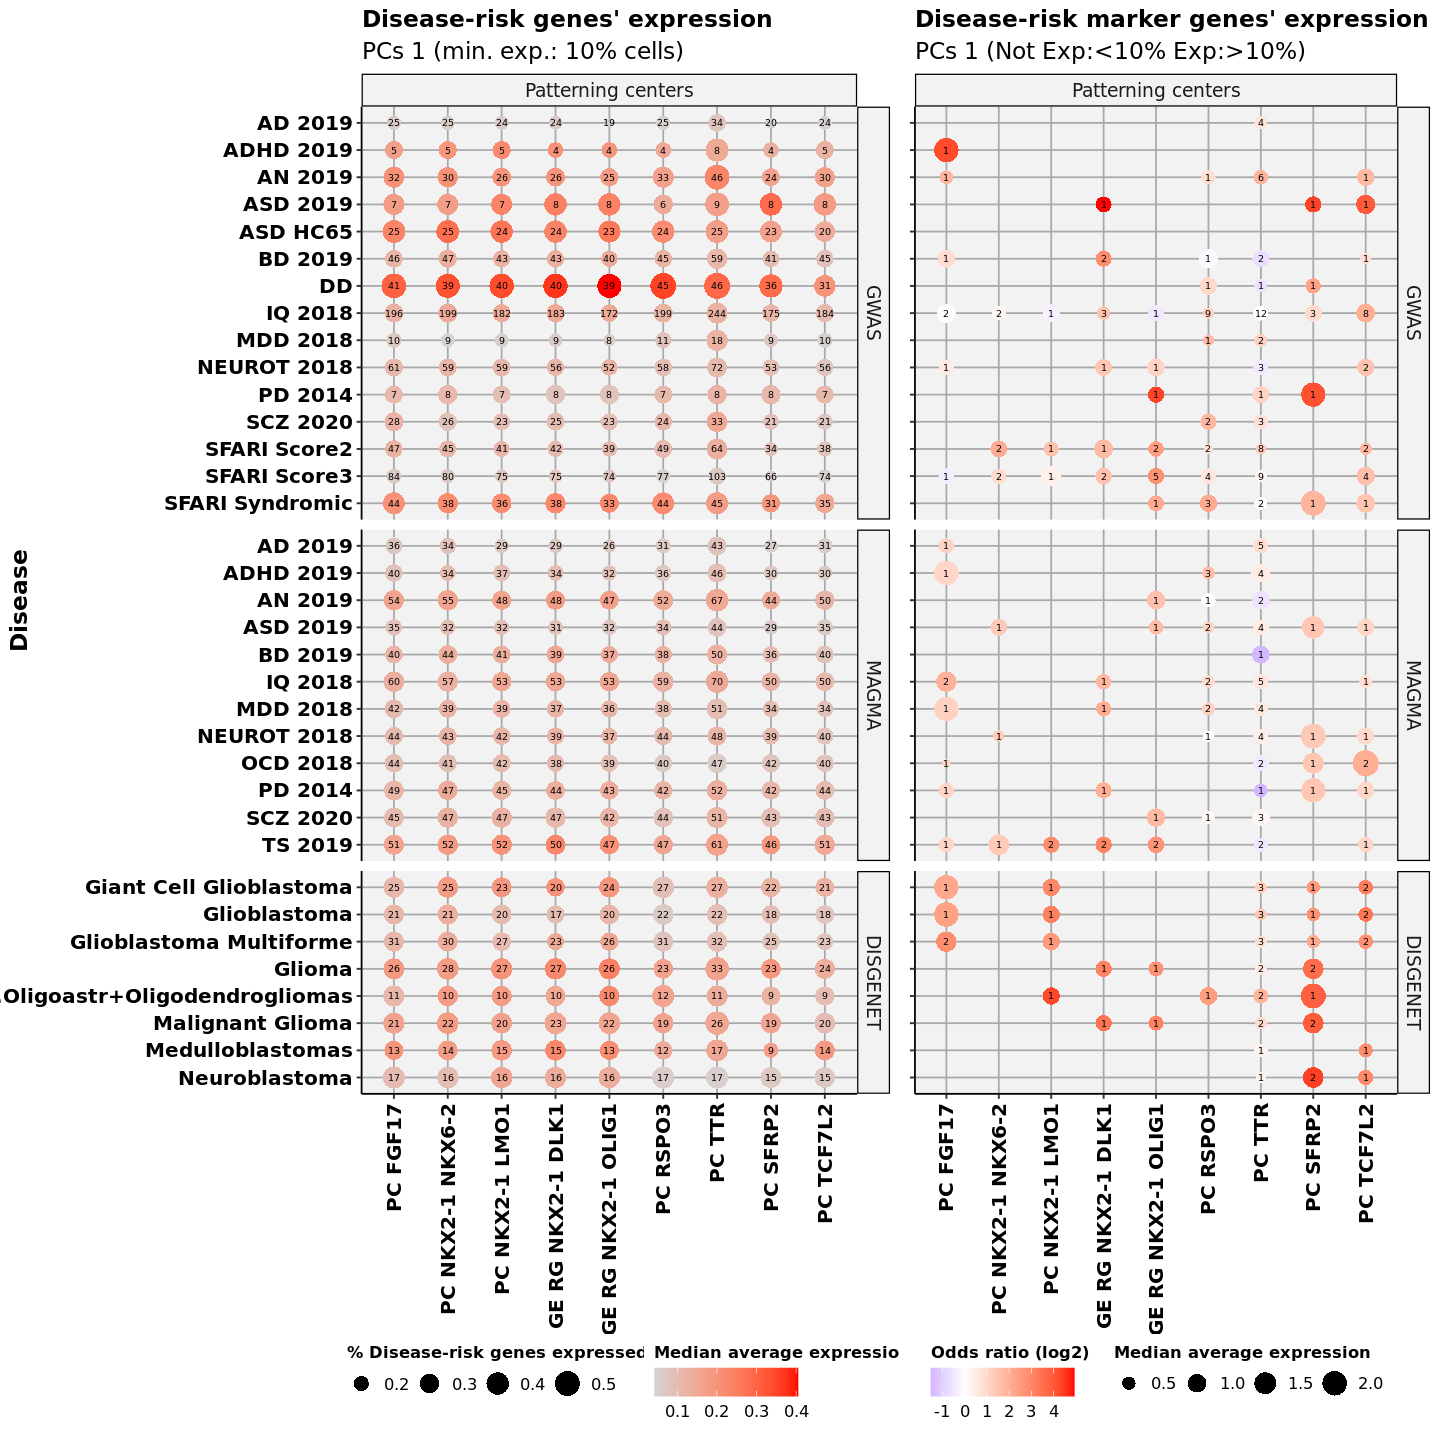

In [21]:
fig(12,12)
combined.selected <- cowplot::plot_grid(
    p1+ labs(x=NULL),
    p2 + theme(axis.text.y = element_blank()) + labs(x=NULL,y=NULL), 
    align = 'h', axis = 'tb', nrow = 1, rel_widths=c(2,1.2))
combined.selected

fname <- paste('Disease-risk and marker genes expression plot', 'NotExp', 0.1, 'Exp', 0.1, 'combined','pdf', sep='.')

pdf(file = fname, width = 12, height=15, useDingbats=FALSE)
plot(combined.selected)
dev.off()